In [24]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [96]:
def Gaussian(z,z0,a,q0):
    return np.exp(-((z-z0)**2)/(2*a**2))*np.exp(1j*q0*z)

def Ev_momentum(k,t):
    m = 1
    Hk = k**2/(2*m)
    return np.exp(-1j*Hk*t)

In [150]:
N = 2**12
z,dz = np.linspace(-10,10,N,retstep=True)
z0 = 2.0
q0 = -10
a = 0.5
WavePacket = Gaussian(z,z0,a,q0)

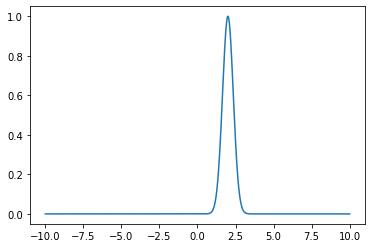

In [151]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z,np.abs(WavePacket)**2)

In [152]:
FFTWavePacket = scp.fft.fft(WavePacket)/N
FFTWavePacketOrdered = scp.fft.fftshift(FFTWavePacket)
dk = 2*np.pi/(N*dz);
k = np.linspace(int(-N/2),int(N/2),N)*dk

FutureFFTWavePacket = Ev_momentum(k,0.5)*FFTWavePacketOrdered

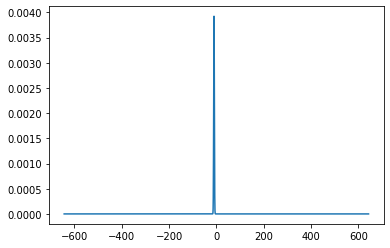

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k,np.abs(FFTWavePacketOrdered)**2)
# ax.set_xlim(-0,20)

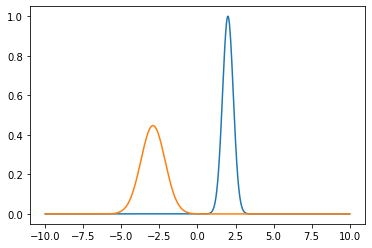

In [154]:
IFFTWavePacket = scp.fft.ifft(FFTWavePacketOrdered)*N
FutureIFFTWavePacket = scp.fft.ifft(FutureFFTWavePacket)*N
# IFFTWavePacket = scp.fft.fftshift(IFFTWavePacket)

dx = 2*np.pi/(N*dk);
x = np.linspace(int(-N/2),int(N/2),N)*dx

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,np.abs(IFFTWavePacket)**2)

ax.plot(x,np.abs(FutureIFFTWavePacket)**2)

# ax.set_xlim(-0,20)

In [160]:
PlaneWaves = np.zeros((N,N)).astype('complex128')
FuturePlaneWaves = np.zeros((N,N)).astype('complex128')

for j in range(N):
    PlaneWaves[j] = FFTWavePacket[j]*np.exp(1j*k[j]*z)
for j in range(N):
    FuturePlaneWaves[j] = Ev_momentum(k[j],0.5)*FFTWavePacketOrdered[j]*np.exp(1j*k[j]*z)

In [161]:
WavePacketReconstructed = np.sum(np.fft.fftshift(PlaneWaves)*dk,axis=0)
FutureWavePacketReconstructed = np.sum(np.fft.fftshift(FuturePlaneWaves)*dk,axis=0)

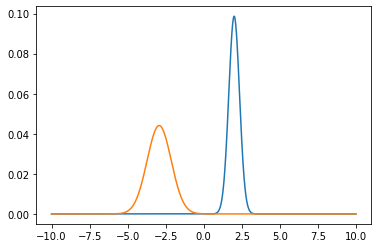

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z,np.abs(WavePacketReconstructed)**2)
ax.plot(z,np.abs(FutureWavePacketReconstructed)**2)

# ax.set_xlim(-0.5,0.5)